In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
data=pd.read_csv("amazon.csv",encoding="iso-8859-1",parse_dates=["date"])

# In your case, the file "amazon.csv" likely contains characters that are not supported by the default encoding (UTF-8). By specifying encoding="iso-8859-1", you're telling pandas to interpret the byte sequences in the file using the ISO-8859-1 encoding.

# This encoding is often used in older data files or files generated by systems in Western Europe or the Americas that don't require the full character set provided by UTF-8.

Encoding refers to the way characters are represented as bytes in a file. Different character encodings map characters to byte sequences differently. Common encodings include:

UTF-8: The most common encoding on the web, capable of encoding all characters in the Unicode character set.
ISO-8859-1: Also known as Latin-1, this encoding supports Western European languages and represents characters as a single byte.
ASCII: A 7-bit character set supporting basic English characters and control codes.

.
Why Use Encoding?
When you load a CSV file, the file's encoding must match the encoding used to write it, or you'll encounter errors or garbled text. If the file contains non-ASCII characters (e.g., accented characters, special symbols), and the encoding is not specified or is incorrectly guessed by pandas, these characters may not display correctly or could cause an error.

In [7]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

# Here we have converted the data column date from datatype obj to datetime[ns]

In [8]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [10]:
data.shape


(6454, 5)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


# Q.  Check for the duplicate data and drop them 

In [13]:
data.duplicated().sum()

32

In [14]:
data=data.drop_duplicates()

In [16]:
data.duplicated().sum()

0

In [17]:
data.shape

(6422, 5)

### Here after dropping the data that we wanted to drop the rows of the dataset actually desreased to 6422 from 6452

# Q..check the null values in the datasets


In [22]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [23]:
# .Q Get overall ststistics about the dataframe

In [29]:
data.describe(include="all")

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


# Q Rename the Months into the English which are available in portuguse

In [31]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [33]:
data["month"].head(5)

0    Janeiro
1    Janeiro
2    Janeiro
3    Janeiro
4    Janeiro
Name: month, dtype: object

In [34]:
data["English_Months"]=data["month"].map({
    "Janeiro": "January",
    "Fevereiro": "February",
    "Março": "March",
    "Abril": "April",
    "Maio": "May",
    "Junho": "June",
    "Julho": "July",
    "Agosto": "August",
    "Setembro": "September",
    "Outubro": "October",
    "Novembro": "November",
    "Dezembro": "December"
})

In [36]:
data.head(5)

,year,state,month,number,date,English_Months
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January


# Q Total number of fires Registered

In [37]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'English_Months'], dtype='object')

In [39]:
data.shape

(6422, 6)

### 6422 fires were registered in the Amazon

# Q. In which months the maximum number of fires were Reported?

In [69]:
data1=data.groupby("English_Months")["number"].sum().sort_values(ascending=False).reset_index()

In [70]:
data1

,English_Months,number
0,July,92319.113
1,October,88681.579
2,August,88050.435
3,November,85508.054
4,September,58578.305
5,December,57535.480
6,June,55997.675
7,January,47681.844
8,May,34725.363
9,February,30839.050


### data.groupby("English_Months"):

This part of the code groups the DataFrame data by the values in the "English_Months" column.
Each unique value in "English_Months" (e.g., "January", "February", etc.) forms a group, and the rows of the DataFrame that share the same "English_Months" value are placed into the same group.
["number"]:

This selects the "number" column from each group created in the previous step. Now, you have a Series for each group, where the index is the value of "English_Months" and the data is the corresponding "number" values.


# .sum():

This function is applied to each group of "number" values. It sums up all the values in the "number" column within each group.
The result is a new Series where the index is "English_Months" and the values are the sum of "number" for each month.


# The reset_index()
function in Pandas is used to reset the index of a DataFrame or Series. By default, when you group data and perform an aggregation (like sum()), the result is often a Series or DataFrame where the group labels become the index. Sometimes, you may want to convert this grouped index back into a regular column and re-establish a default integer index. This is where reset_index() comes in.

How reset_index() Works
Default Behavior: reset_index() will reset the index of the DataFrame or Series to the default integer index (0, 1, 2, ...). If the current index is not a default integer index (like when you group by a column), reset_index() will move the current index into a new column and create a new default integer index.

In [64]:
data.groupby("month")["number"].sum().sort_values(ascending=False)

month
Julho        92319.113
Outubro      88681.579
Agosto       88050.435
Novembro     85508.054
Setembro     58578.305
Dezembro     57535.480
Junho        55997.675
Janeiro      47681.844
Maio         34725.363
Fevereiro    30839.050
Março        30709.405
Abril        28184.770
Name: number, dtype: float64

<Axes: xlabel='month', ylabel='number'>

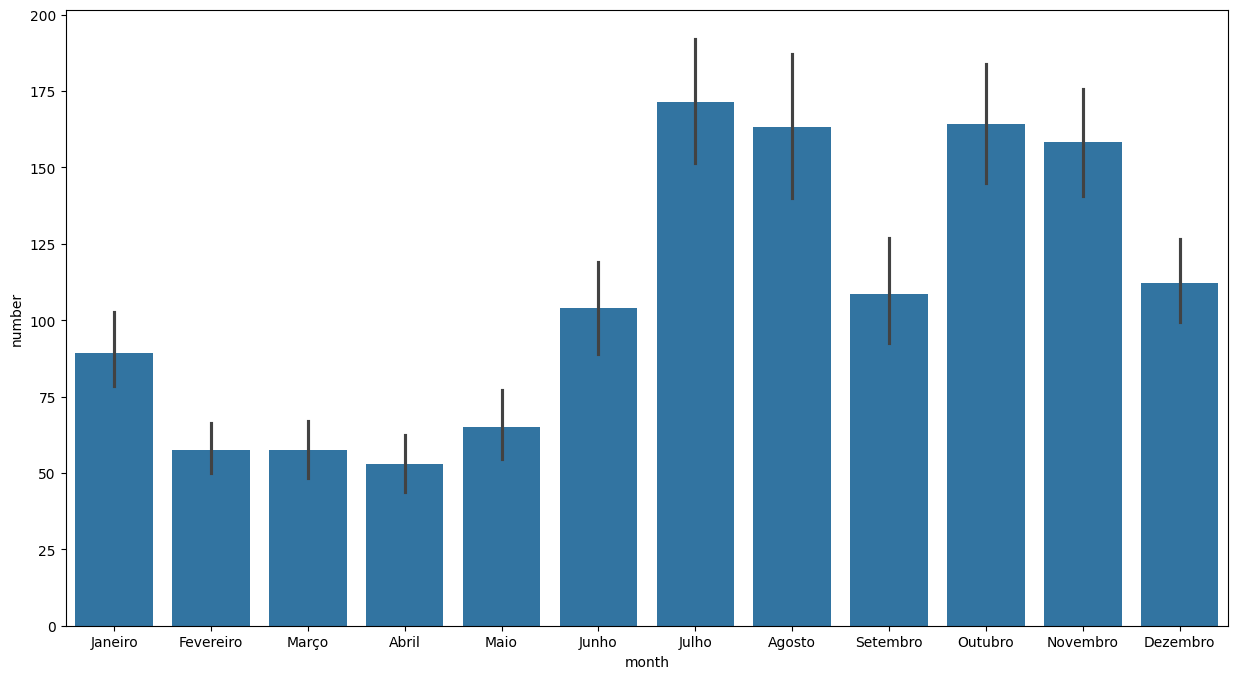

In [73]:
plt.figure(figsize=(15,8))
sns.barplot(x="month",y="number",data=data)

# Q in which year the maximim number of Forest Fires were Reported

In [56]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'English_Months'], dtype='object')

In [66]:
data.groupby("year")["number"].sum().sort_values(ascending=False).reset_index()

,year,number
0,2003,42760.674
1,2016,42212.229
2,2015,41208.292
3,2012,40084.860
4,2014,39621.183
5,2009,39116.178
6,2004,38450.163
7,2002,37390.600
8,2010,37037.449
9,2017,36619.624


In [96]:
data_year=data.groupby("year")["number"].sum().reset_index()

In [97]:
data_year

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

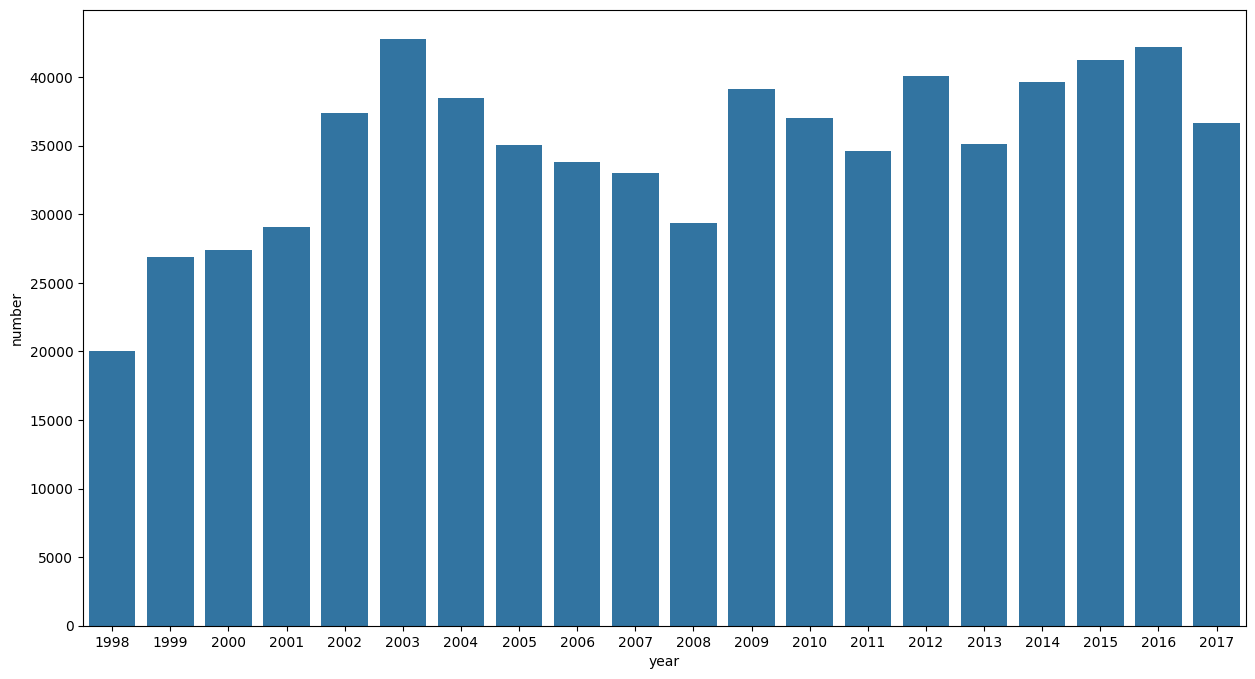

In [98]:
plt.figure(figsize=(15,8))
sns.barplot(x="year",y="number",data=data_year)

# Q in which state the maximim number of forest fires were reported

In [75]:
data4=data.groupby("state")["number"].sum().sort_values(ascending=False)

In [76]:
data4

state
Mato Grosso         96246.028
Paraiba             52426.918
Sao Paulo           51121.198
Rio                 45094.865
Bahia               44746.226
Piau                37803.747
Goias               37695.520
Minas Gerais        37475.258
Tocantins           33707.885
Amazonas            30650.129
Ceara               30428.063
Maranhao            25129.131
Pará                24512.144
Pernambuco          24498.000
Roraima             24385.074
Santa Catarina      24359.852
Amapa               21831.576
Rondonia            20285.429
Acre                18464.030
Espirito Santo       6546.000
Alagoas              4606.000
Distrito Federal     3561.000
Sergipe              3237.000
Name: number, dtype: float64

In [93]:
data5=data.groupby("state")["number"].sum().reset_index()

In [94]:
data5

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


### In the plot we have to use the data that donot have the sort_values because it uses the index as the int but not the actual number so we have to use the data 4 which donot have the doet_values() method

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Acre'),
  Text(1, 0, 'Alagoas'),
  Text(2, 0, 'Amapa'),
  Text(3, 0, 'Amazonas'),
  Text(4, 0, 'Bahia'),
  Text(5, 0, 'Ceara'),
  Text(6, 0, 'Distrito Federal'),
  Text(7, 0, 'Espirito Santo'),
  Text(8, 0, 'Goias'),
  Text(9, 0, 'Maranhao'),
  Text(10, 0, 'Mato Grosso'),
  Text(11, 0, 'Minas Gerais'),
  Text(12, 0, 'Paraiba'),
  Text(13, 0, 'Pará'),
  Text(14, 0, 'Pernambuco'),
  Text(15, 0, 'Piau'),
  Text(16, 0, 'Rio'),
  Text(17, 0, 'Rondonia'),
  Text(18, 0, 'Roraima'),
  Text(19, 0, 'Santa Catarina'),
  Text(20, 0, 'Sao Paulo'),
  Text(21, 0, 'Sergipe'),
  Text(22, 0, 'Tocantins')])

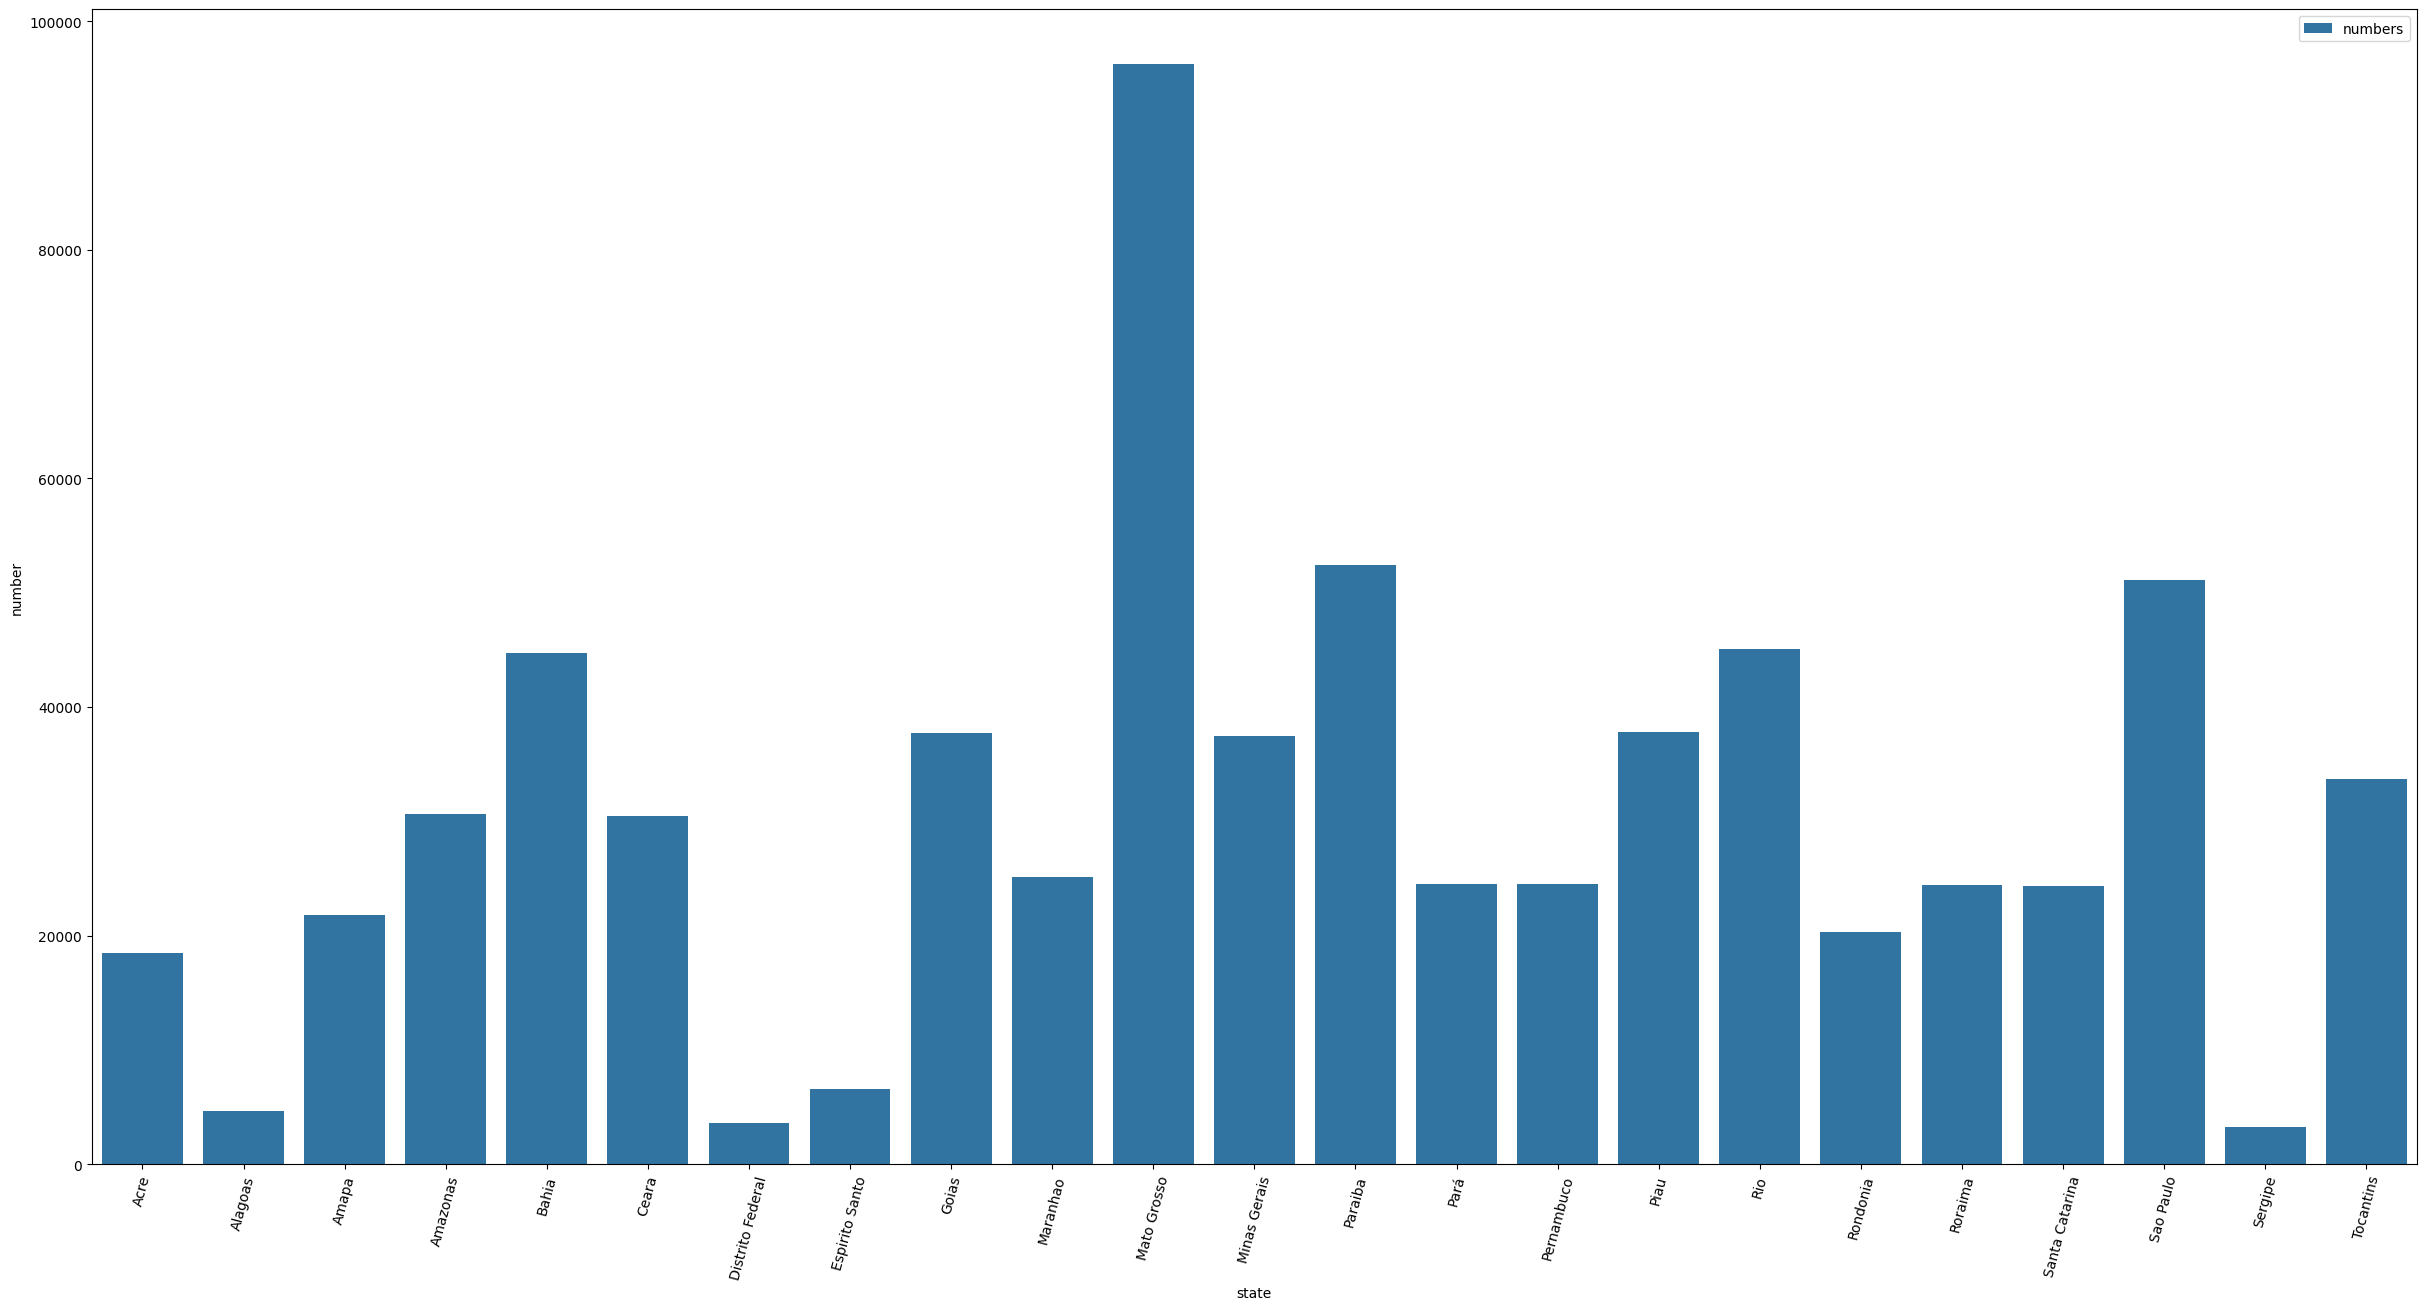

In [100]:
plt.figure(figsize=(30,15))
sns.barplot(x="state",y="number",data=data5
            ,label="numbers")
plt.legend()
plt.xticks(rotation=75)

# Q find the total number of fires that were reported in the Amazons

### The question is asking the amazona state not the whole

In [101]:
data[data["state"]=="Amazonas"]["number"].sum()

30650.129

# Q... Dipslay the Number of fires That were reported in Amazonas in year wise

In [102]:
data.columns


Index(['year', 'state', 'month', 'number', 'date', 'English_Months'], dtype='object')

In [112]:
data_Amazon=data[data["state"]=="Amazonas"]
data_with_year_sum=data_Amazon.groupby('year')["number"].sum().reset_index()
data_with_year_sum

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


### i used the data[data["state"]=="Amazonas"]["year"] but this method donot group the year and provides the number in different years ie there can be 2007 in  2 to three place which makes the data unmanaged so i have used data_amazon .group by()  as if i had used data,,groupby then it will take the whole data and the process woiuld be wrong but i have taken data_amazon.groupby() which will take only the info of the amazon state  

In [118]:
data_of_amazon=data[data["state"]=="Amazonas"]
data_yearly=data_of_amazon.groupby("year")["number"].sum().reset_index()

data_yearly

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


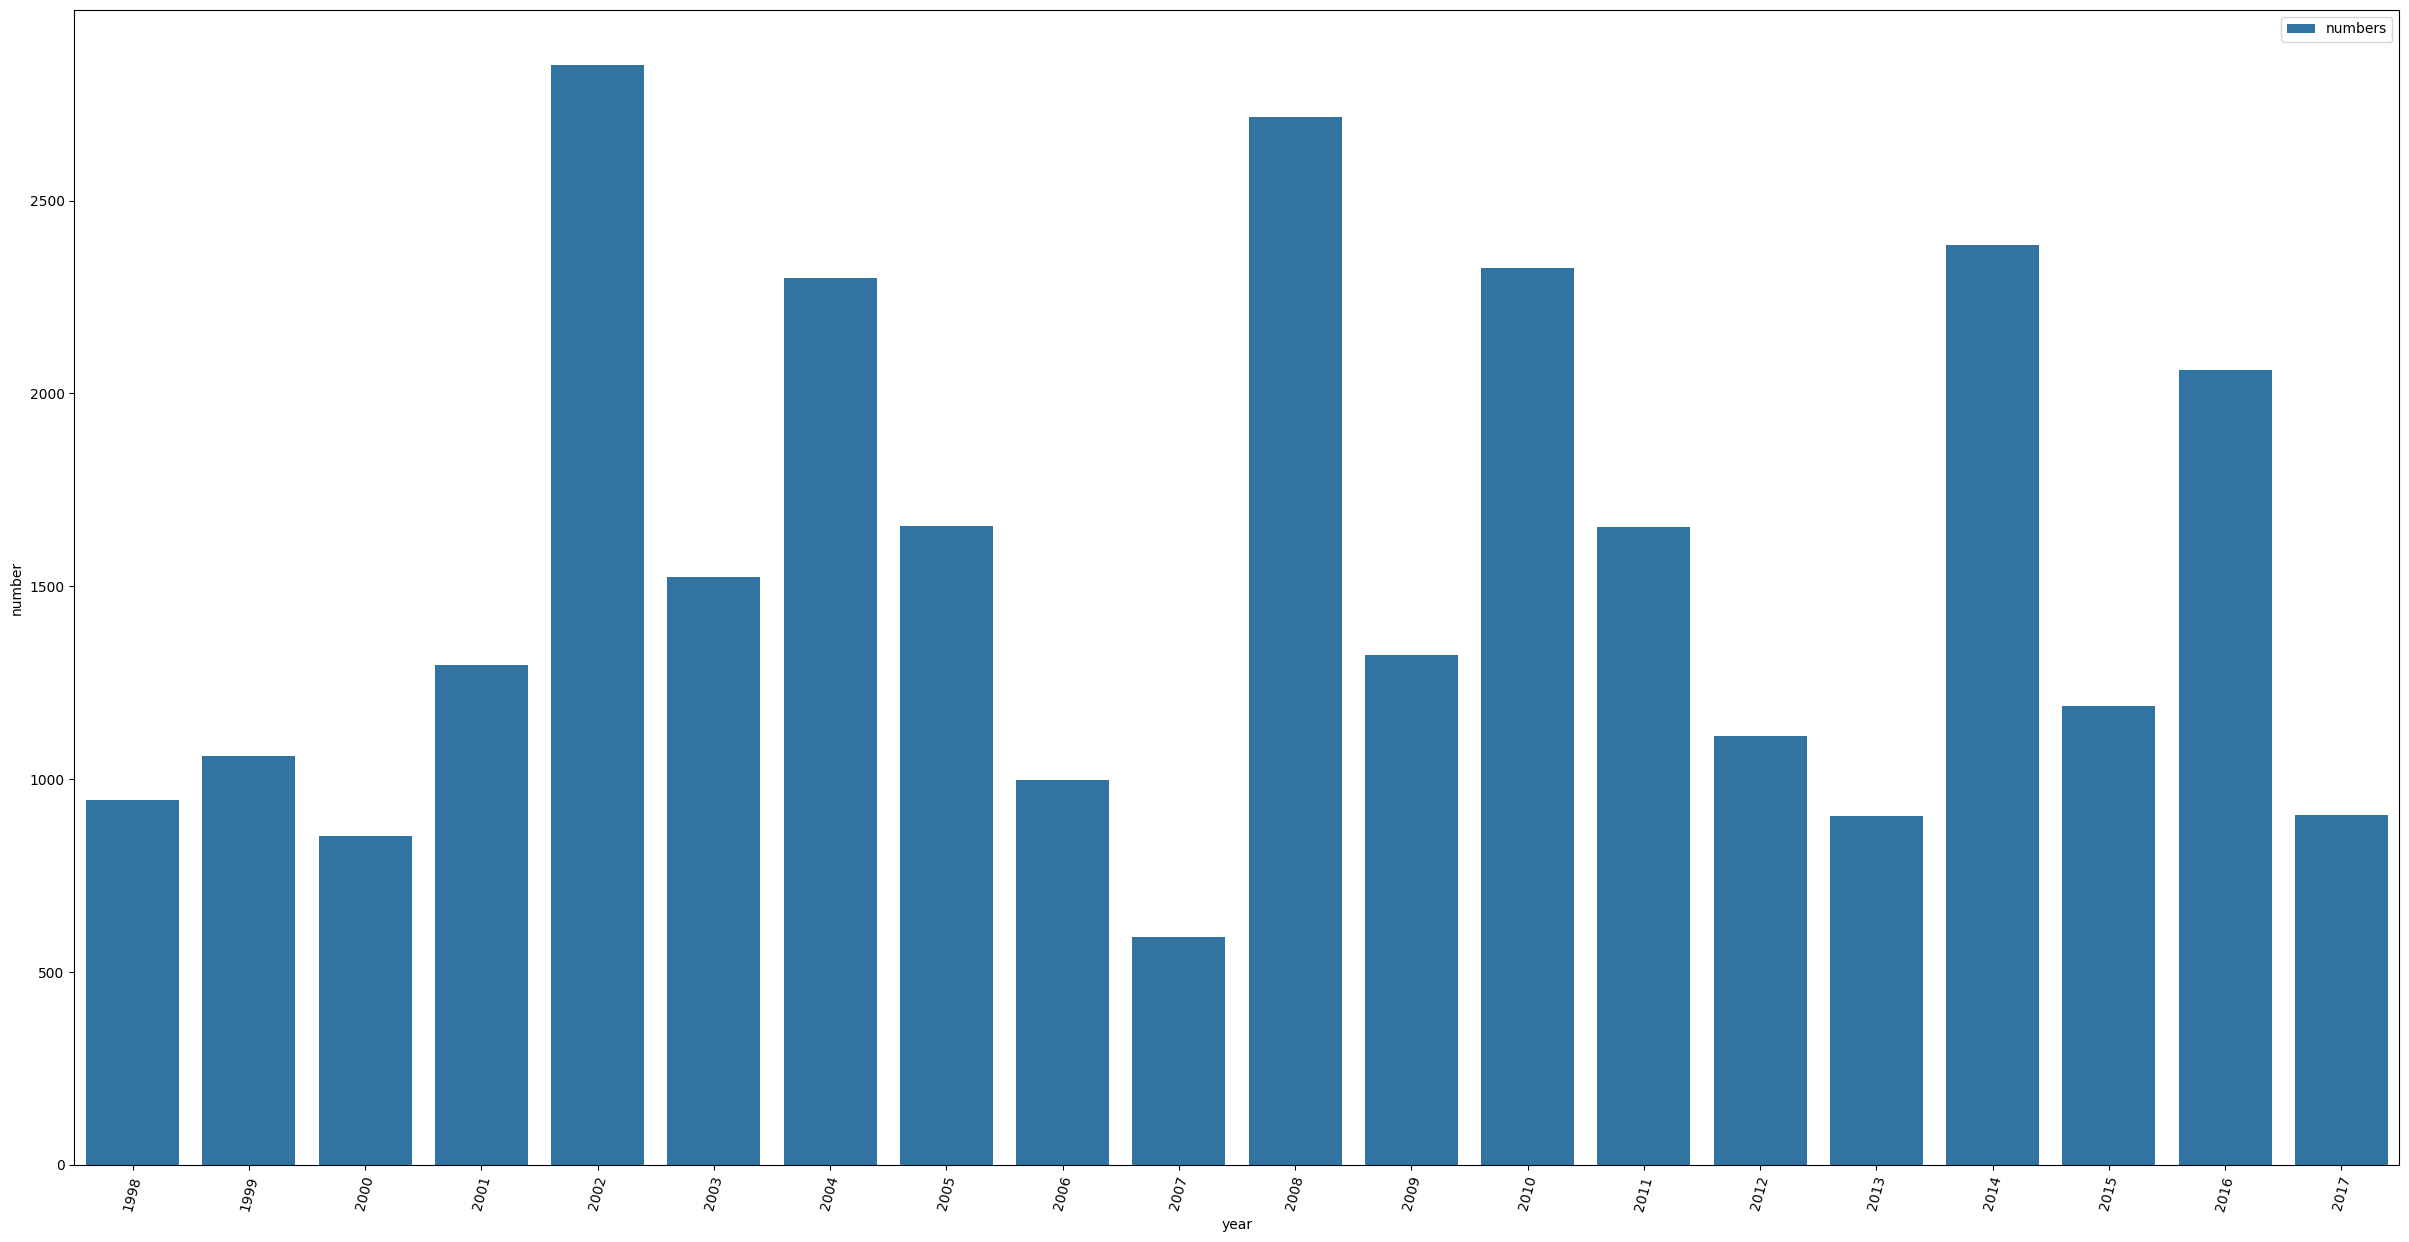

In [120]:
plt.figure(figsize=(30,15))

plt.xticks(rotation=75)
sns.barplot(x="year",y="number",data=data_yearly,label="numbers")
plt.legend()

### IN the above plot i have used the data yearly asdata_yearly=data_of_amazon.groupby("year")["number"].sum()but it comes error but when i add the reset_index() ....data_yearly=data_of_amazon.groupby("year")["number"].sum().reset_index() then the proble has been solved 

# Q... Display the Number of Fires reported in Amazons Day Wise

In [121]:
data.columns


Index(['year', 'state', 'month', 'number', 'date', 'English_Months'], dtype='object')

In [124]:
data_of_amazon1=data[data["state"]=="Amazonas"]


In [131]:
day = data_of_amazon1.groupby(data_of_amazon1["date"].dt.dayofweek)["number"].sum()



In [132]:
import calendar
day.index=[calendar.day_name[x] for x in range(0,7)]
day

Monday       1886.601
Tuesday      6474.217
Wednesday    3910.177
Thursday     5754.802
Friday       5446.480
Saturday     4162.666
Sunday       3015.186
Name: number, dtype: float64

In [133]:
data_Of_amazon=data[data["state"]=="Amazonas"]


In [145]:
day1=data_Of_amazon.groupby(data["date"].dt.dayofweek)["number"].sum()

In [146]:
import calendar 
day1.index=[calendar.day_name[x] for x in range(0,7)]
day1

,date,number
Monday,0,1886.601
Tuesday,1,6474.217
Wednesday,2,3910.177
Thursday,3,5754.802
Friday,4,5446.480
Saturday,5,4162.666
Sunday,6,3015.186


## Grouping by Day of Week:

data['date'].dt.dayofweek extracts the day of the week as integers from the date column.
.groupby(...).sum() groups by these integer values and sums the "number" column.
Mapping Index to Day Names:

calendar.day_name is a list where calendar.day_name[0] is "Monday", calendar.day_name[1] is "Tuesday", and so on up to calendar.day_name[6] for "Sunday".
day.index is reassigned with day names corresponding to the integers in the index.


In [148]:
sns.barplot(x='day_of_week',y="number",data=day1)

ValueError: Could not interpret value `day_of_week` for `x`. An entry with this name does not appear in `data`.

# ..Q Find the Total number of Fires that were reported in 2015 and visualize the data based on months

In [151]:
data_months=data[data["year"]==2015]

In [154]:
data_yearly=data_months.groupby("English_Months")["number"].sum().reset_index()

In [155]:
data_yearly


,English_Months,number
0,April,2573.000
1,August,4363.125
2,December,4088.522
3,February,2309.000
4,January,4635.000
5,July,4364.392
6,June,3260.552
7,March,2202.000
8,May,2384.000
9,November,4034.518


<Axes: xlabel='English_Months', ylabel='number'>

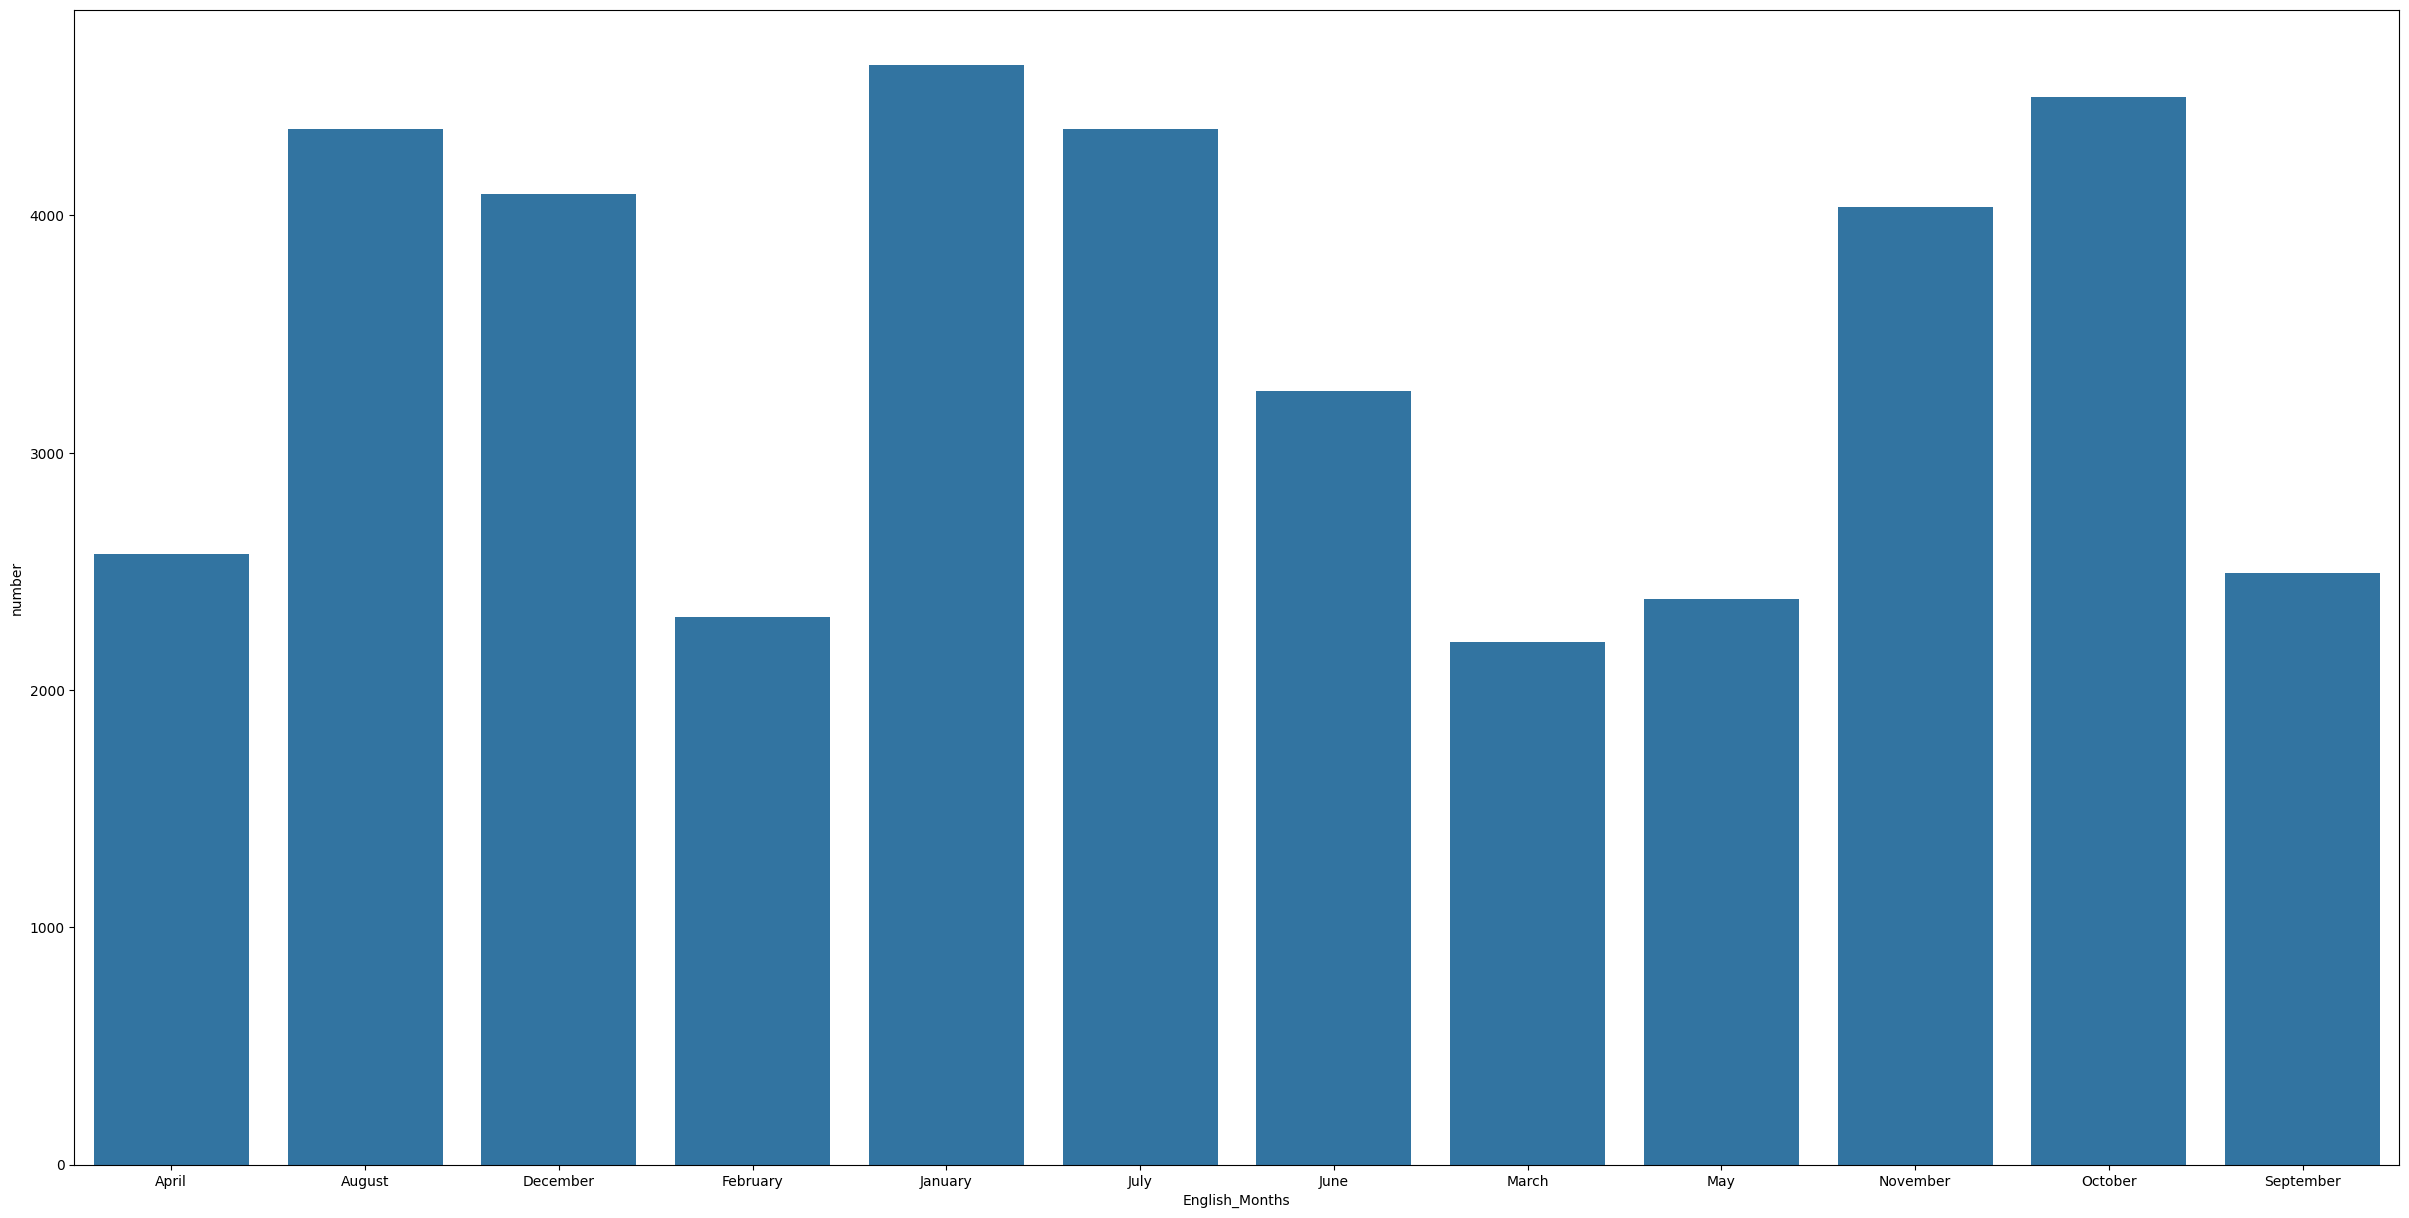

In [158]:
plt.figure(figsize=(30,15))
sns.barplot(x="English_Months",y="number",data=data_yearly)

In [159]:
# Q .. Find the average number of fires reported from highst to the lowest state wise

In [163]:
data.groupby("state")["number"].mean()

state
Acre                 77.255356
Alagoas              19.271967
Amapa                91.345506
Amazonas            128.243218
Bahia               187.222703
Ceara               127.314071
Distrito Federal     14.899582
Espirito Santo       27.389121
Goias               157.721841
Maranhao            105.142808
Mato Grosso         203.479975
Minas Gerais        156.800243
Paraiba             111.073979
Pará                102.561272
Pernambuco          102.502092
Piau                158.174674
Rio                  64.698515
Rondonia             84.876272
Roraima             102.029598
Santa Catarina      101.924067
Sao Paulo           213.896226
Sergipe              13.543933
Tocantins           141.037176
Name: number, dtype: float64

<Axes: xlabel='state', ylabel='number'>

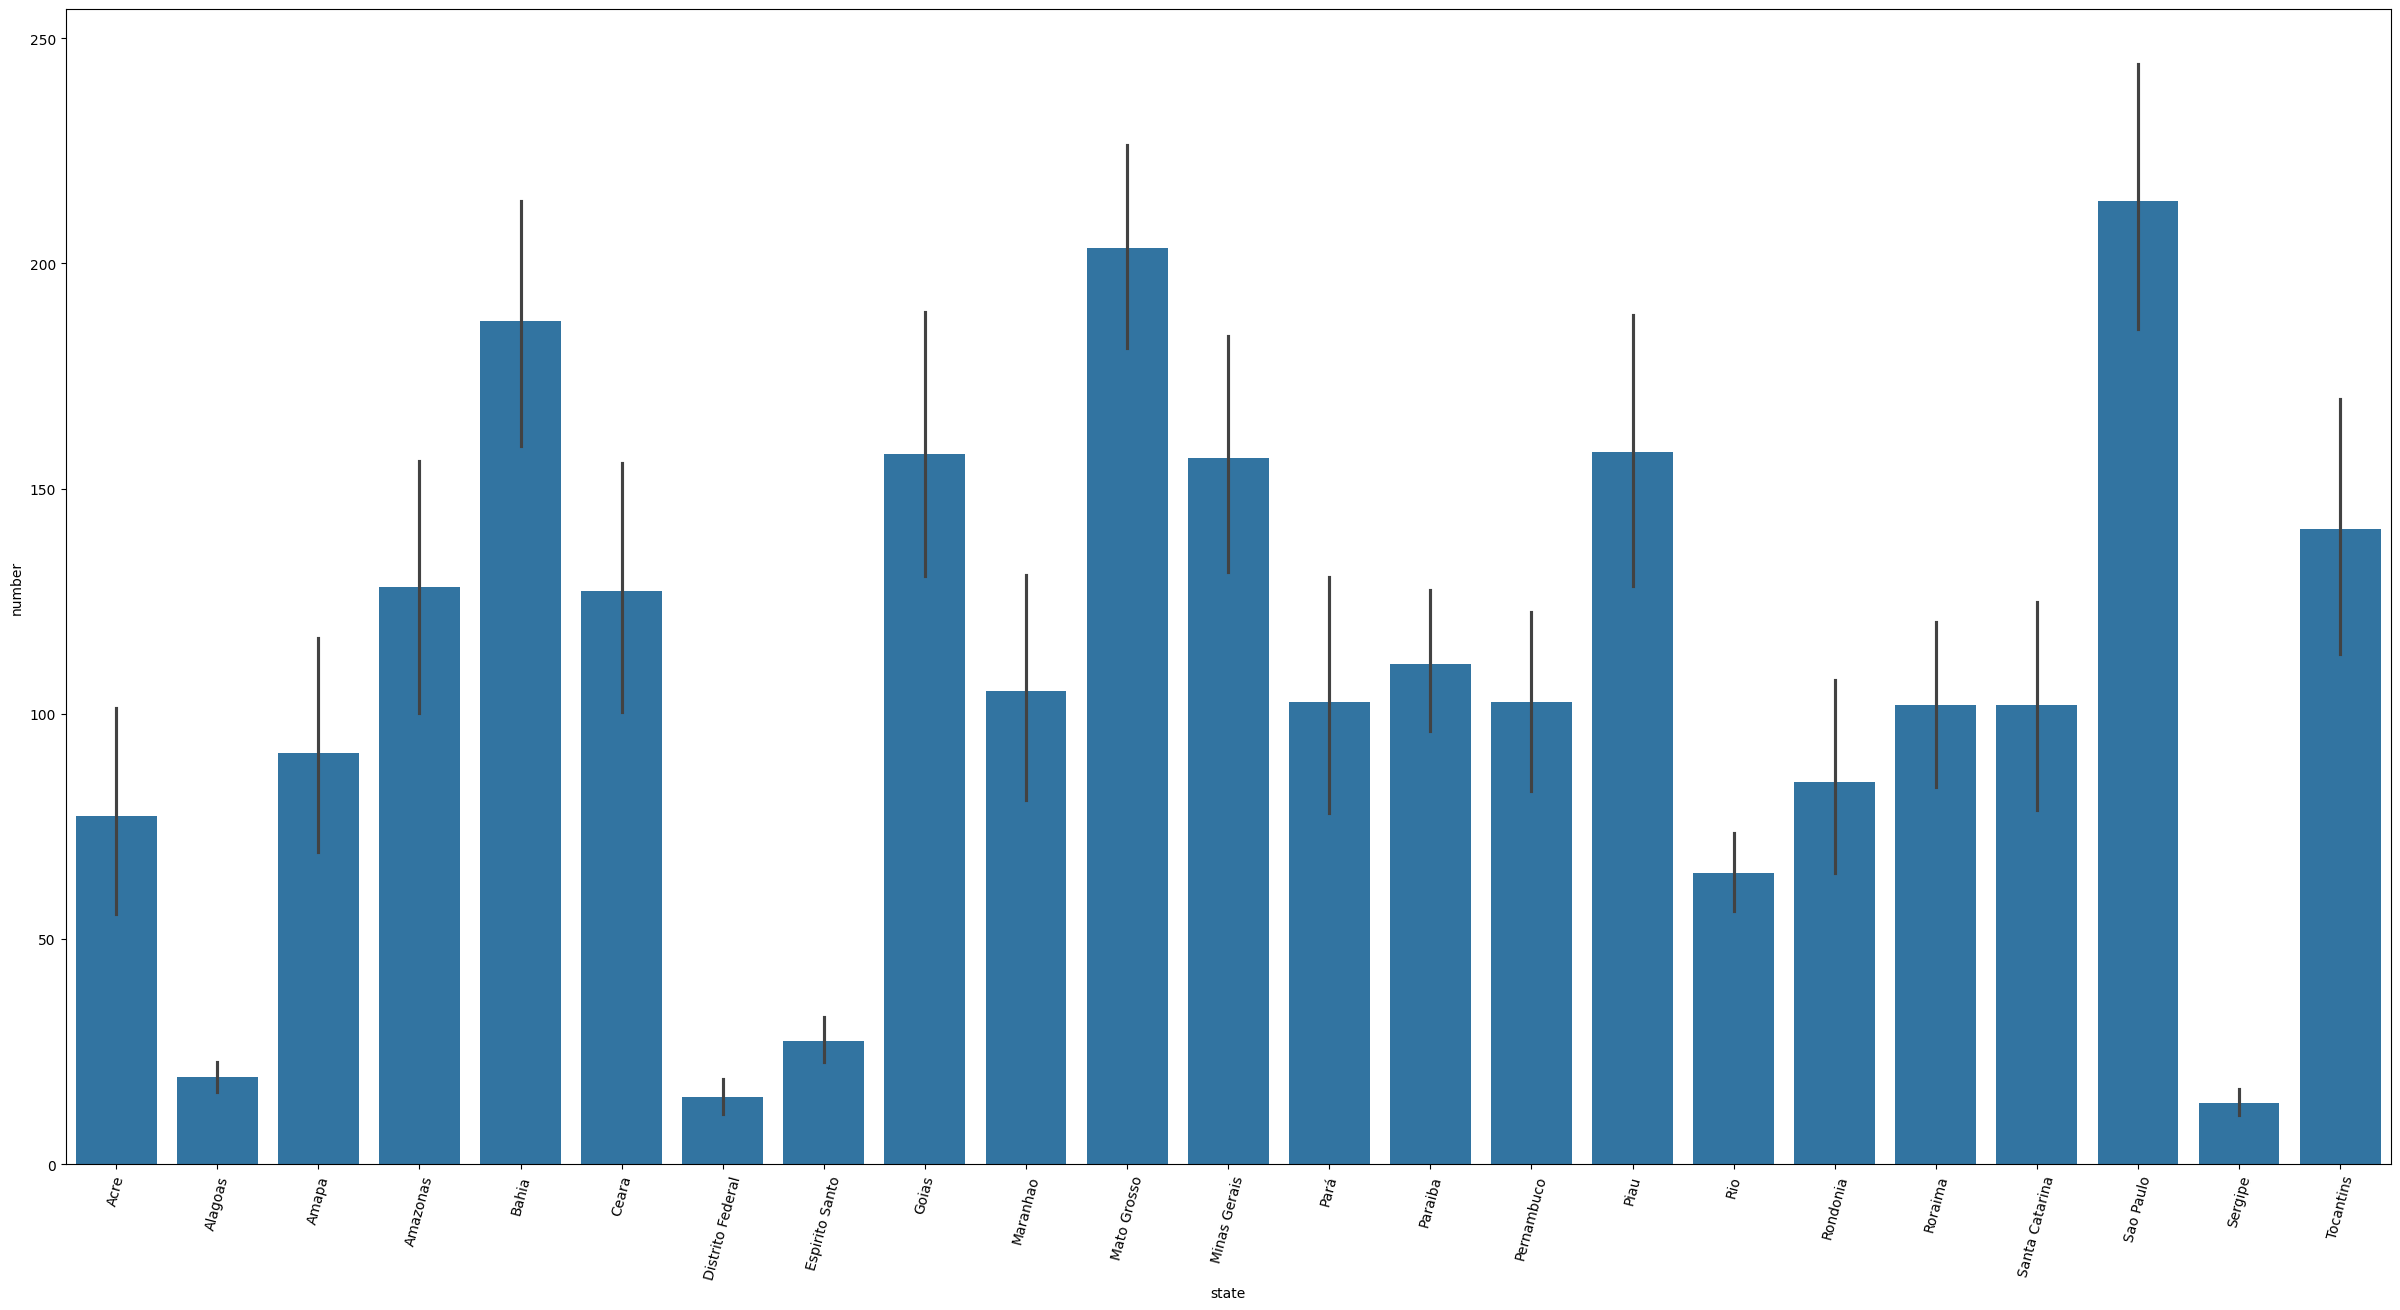

In [166]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=75)
sns.barplot(x="state",y="number",data=data)


# Q to find the state names where the  fires were Reported in December

In [168]:
data[data["English_Months"]=="December"]["state"]

220          Acre
221          Acre
222          Acre
223          Acre
224          Acre
          ...    
6449    Tocantins
6450    Tocantins
6451    Tocantins
6452    Tocantins
6453    Tocantins
Name: state, Length: 513, dtype: object